# 코랩 한글 설정

In [ ]:
#그래프의 전체적인 설정을 하는 객체
import matplotlib as mpl
#그래프를 그리는 객체
import matplotlib.pyplot as plt



In [ ]:
plt.style.use("seaborn")

In [ ]:
#그래프의 글자를 선명하게 출력하도록 설정 
%config InlineBackend.figure_format = 'retina'
#나눔 글자체 설치 
!apt -qq -y install fonts-nanum
 



fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)


In [ ]:
#폰트 이름 설정
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()

In [ ]:
#그래프 그림 (가로 5 세로5)
plt.figure(figsize=(5,5))
#X ,Y 좌표 설정
plt.plot([0,1], [0,1], label='한글테스트용')
#범례 표시
plt.legend()
#그래프 그림
plt.show()

# 날씨데이터 크롤링

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
response = requests.get('https://www.weather.go.kr/weather/observation/currentweather.jsp')
soup = bs(response.text,'html.parser')

table = soup.find("table", {"class": "table_develop3"})
data = []
for tr in table.findAll('tr'):
  if tr.find('a'):
    data.append([tr.find("a").text, tr.findAll("td")[5].text,tr.findAll("td")[9].text])

with open("weather.csv","w") as file:

  file.write("point,temperature,humidity\n")
for point, temp, humi in data:
  print("point = ", point)
  print("temperature = ", temp)
  print("humidity = ", humi)
  print("="*100)


with open("weather.csv",'a') as file:
  for point,temp,humi in data:
    file.write("{},{},{}\n".format(point,temp,humi))

In [ ]:
import pandas as pd
# panda 본명대신 별명 pd 사용
pd.read_csv("weather.csv")

df = pd.read_csv("weather.csv")
# pd의 read_csv 기능을 사용하여 "weather.csv" 불러오기


df["point"] == "합천"
# point 줄이 합천이면 True  ,, 아니면 False

df[ df["point"] == "합천" ]
# df["point"] == "합천" : point칸에 저장된 값이 "합천"인 줄  , 조건 일치true , 아니면 false

df["point"].isin(["강릉","흑산도","합천"])
# point가 "강릉" ,"흑산도" ,"합천"이면 True  , 아니면 False

df [df["point"].isin(["강릉","흑산도","합천"])]
# point가 "강릉" ,"흑산도" ,"합천"이면 True  , 아니면 False로 나눠서
# True인것(강릉,흑산도,합천) 으로 df 생성   (df는 Data Frame으로 그냥 테이블(표) 같은것!)

df [  df["point"].isin( ["서울","인천","수원","대전","대구","광주","부산","울산"] ) ]
# 위와 동일
# point가 ["서울","인천","수원","대전","대구","광주","부산","울산"]이면  df생성

df = df.set_index("point")
# point 칸을 index로 설정  *@@@@@@*
# point칸에 저장된 값은 loc 함수로 쉽게 검색 가능

df.loc[["서울","대전","인천"]] 
# 위에서 isin보다 간편하게 검색 할수있음

df["humidity"].isin([70, 74 ,80])
# humidity칸에 저장된 값이 70, 74 ,80 인 줄 조건 만족하면 True, 아니면 False

df[df["humidity"].isin([70, 74 ,80])]
df = df.reset_index()  
# 기존 인덱스 point 취소 ,,,즉 3줄쯤 위에 *@@@@@*에 point로 설정한거 초기화

df = df.set_index("humidity")
# humidity칸을 index로 설정

In [ ]:
pd.read_csv("weather.csv",index_col = 'point')
# weather.csv 읽으면서 point칸을 인덱스로 설정
df = pd.read_csv("weather.csv", index_col = "point")

In [ ]:
df.loc[["서울","부산"]]
city_df = df.loc[["서울","인천","대전","대구","광주","부산"]]
city_df

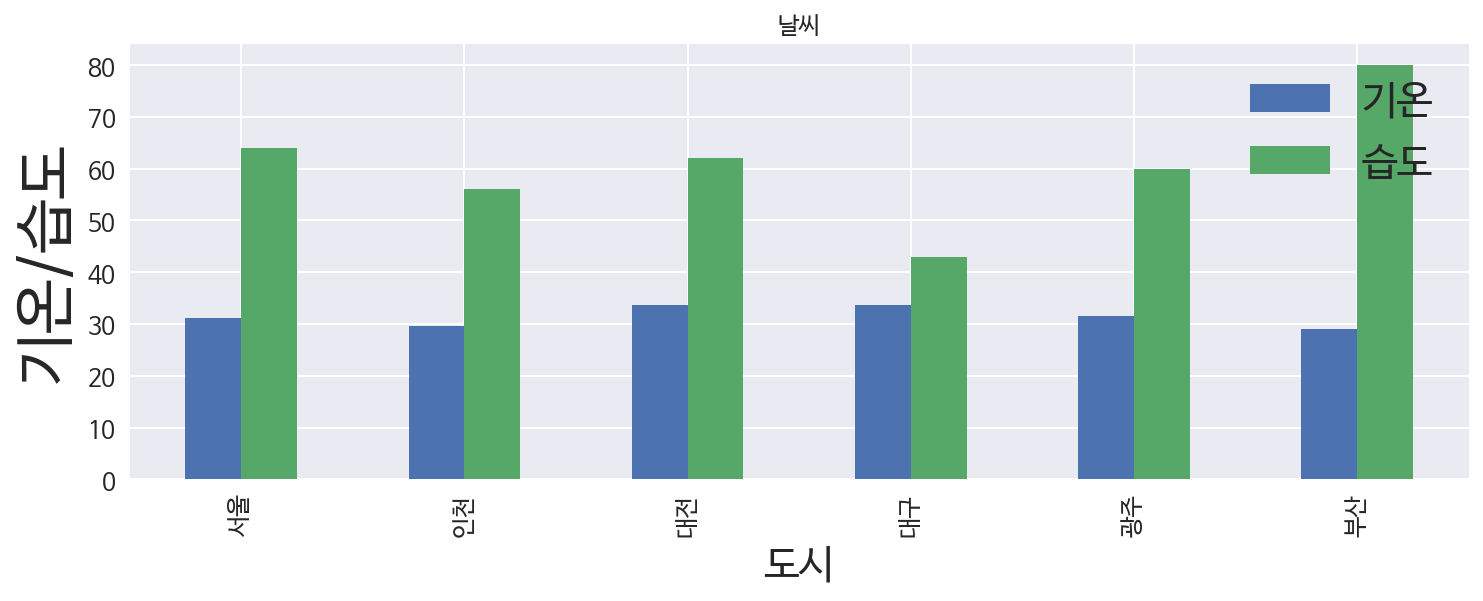

In [ ]:
# ax = city_df.plot()
ax = city_df.plot(kind="bar", title="날씨", figsize=(12, 4), legend = True, fontsize=12)
ax.set_xlabel("도시", fontsize=20)
ax.set_ylabel("기온/습도", fontsize=30)
ax.legend(["기온","습도"], fontsize=20, loc ="best")

In [ ]:
plt.style.use('ggplot')


# 확인 문제

- 영화 평점 분석
- 자료 383 ~ 384

In [ ]:
import urllib.request as req
from bs4 import BeautifulSoup as bs

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210713'
html = req.urlopen(url)

soup = bs(html,'html.parser')

title_a = soup.findAll("td", {"class":"title"})
title_a

title_b = soup.findAll("div", {"class","tit5"})

title_b

for item in title_a:
  print(item.find('a').text)

points = soup.findAll('td',{"class":"point"})

for point in points:
  print(point.text)

title = []
for item in title_a:
  title.append(item.find('a').text)

pointOfMovie = soup.findAll("td",{"class":"point"})
points = []
for p in pointOfMovie:
  points.append(p.text)




In [ ]:
for i in range(0,len(title)):
  print(str(i+1) + ":" + title[i] + "(" + points[i] + ")")

1:극장판 귀멸의 칼날: 무한열차편( 9.28)
2:부활: 그 증거( 9.27)
3:크루엘라( 9.25)
4:해피 투게더( 9.19)
5:우드잡( 9.12)
6:루카( 9.05)
7:번지 점프를 하다( 8.98)
8:이보다 더 좋을 순 없다( 8.95)
9:더 파더( 8.94)
10:남매의 여름밤( 8.94)
11:러브 액츄얼리( 8.93)
12:중경삼림( 8.92)
13:이별의 아침에 약속의 꽃을 장식하자( 8.89)
14:잔칫날( 8.87)
15:너의 이름은.( 8.79)
16:화양연화( 8.77)
17:블랙 위도우( 8.56)
18:노매드랜드( 8.46)
19:링( 8.44)
20:너의 췌장을 먹고 싶어( 8.38)
21:초속5센티미터( 8.35)
22:인 더 하이츠( 8.31)
23:콰이어트 플레이스 2( 8.24)
24:언어의 정원( 8.17)
25:하나와 앨리스( 8.11)
26:너의 췌장을 먹고 싶어( 8.09)
27:날씨의 아이( 7.95)
28:별을 쫓는 아이( 7.92)
29:미나리( 7.65)
30:분노의 질주: 더 얼티메이트( 7.62)
31:킬러의 보디가드 2( 7.37)
32:온다( 7.11)
33:기기괴괴 성형수( 6.93)
34:발신제한( 6.79)
35:파이프라인( 6.67)
36:컨저링 3: 악마가 시켰다( 6.53)
37:미드나이트( 5.20)
38:여고괴담 여섯번째 이야기 : 모교( 5.16)
